In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
dictionary = pd.read_csv('taxi+_zone_lookup.csv')

In [43]:
dictionary.head()
#bad locations: 0, 265, 264

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [161]:
data = pd.read_csv( 'nhbr_data2.csv', names = ['PU','DO','$','passengers','week_trips','wend_trips'])
data.head()

,PU,DO,$,passengers,week_trips,wend_trips
0,[261,56,2069.06,89,32,20]
1,[209,86,428.70,9,4,1]
2,[52,100,3828.13,180,93,27]
3,[244,119,3672.82,550,194,134]
4,[220,186,78.64,2,1,1]


In [168]:
def look_up(loc_id):
    return dictionary[dictionary['LocationID'] == loc_id]['Zone'].values[0]

data = pd.read_csv( 'nhbr_data2.csv', names = ['PU','DO','$','passengers','week_trips','wend_trips']
                  )
data['PU'] = data['PU'].str[1:]
data['wend_trips'] = data['wend_trips'].str[:-1]

data['wend_trips'] = pd.to_numeric(data['wend_trips'], errors='coerce')
data['PU'] = pd.to_numeric(data['PU'], errors='coerce')
data['DO'] = pd.to_numeric(data['DO'], errors='coerce')

data['occurences'] = data['week_trips'] + data['wend_trips']

data = data[ (data['DO'] != 0) & (data['PU'] != 0)
            & (data['DO'] != 265) & (data['PU'] != 265)
            & (data['DO'] != 264) & (data['PU'] != 264)  ]

#data['occurences'] = pd.to_numeric(data['occurences'], errors='coerce')

data = data.sort(['occurences'], ascending = False)#, ascending=[1, 0])

data['PU_nhbr'] = data['PU'].apply(lambda x: look_up(x))
data['DO_nhbr'] = data['DO'].apply(lambda x: look_up(x))

data.head()

/home/lihan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,PU,DO,$,passengers,week_trips,wend_trips,occurences,PU_nhbr,DO_nhbr
13167,237,236,2559448.11,500956,249343,60692,310035,Upper East Side South,Upper East Side North
25852,236,237,2558266.06,431270,213397,54112,267509,Upper East Side North,Upper East Side South
26536,236,236,1733735.52,401296,199664,49477,249141,Upper East Side North,Upper East Side North
14054,237,237,1866541.65,391203,196569,48822,245391,Upper East Side South,Upper East Side South
14771,239,142,1185089.31,248820,104212,46582,150794,Upper West Side South,Lincoln Square East


In [171]:
data = data.sort(['$'], ascending = False)#, ascending=[1, 0])
data.head()

/home/lihan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,PU,DO,$,passengers,week_trips,wend_trips,occurences,PU_nhbr,DO_nhbr
26485,138,230,4578572.28,158756,69516,18249,87765,LaGuardia Airport,Times Sq/Theatre District
23693,132,230,4404238.71,132230,50853,18679,69532,JFK Airport,Times Sq/Theatre District
30219,138,161,3391859.34,117096,57803,9735,67538,LaGuardia Airport,Midtown Center
31113,138,162,3369564.55,122707,60757,11050,71807,LaGuardia Airport,Midtown East
3320,230,138,3300571.90,122248,51398,16973,68371,Times Sq/Theatre District,LaGuardia Airport


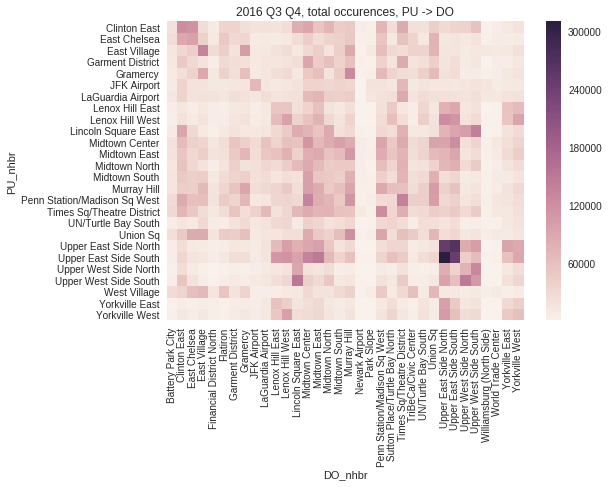

In [185]:
import seaborn as sns; sns.set()

display = data.iloc[1:200 ,:]

def matrix(string, avg = False, centered=False ):
    flights = display.pivot("PU_nhbr", "DO_nhbr", string)
    for index, row in flights.iterrows():
        for col in row.index:
            value = data[(data['DO_nhbr'] == col) & (
                    data['PU_nhbr'] == index)][string].values[0] 
            # passenger per trip or $ per trip
            if avg:
                value /= data[(data['DO_nhbr'] == col) & (
                    data['PU_nhbr'] == index)]['occurences']
            flights = flights.set_value(
                index, col, value)
                
    # to stop centering the heatmap at
    # median value, comment out center argument
    if centered:
        ax= sns.heatmap(flights, center = display[string].median())
    else:
        ax= sns.heatmap(flights)#, center = display[string].median())#,cmap=cmap)
    plt.title('2016 Q3 Q4, total %s, PU -> DO' %(string) )
    if avg:
        plt.title('2016 Q3 Q4, avg %s per trips PU -> DO' %(string) )
    
matrix('occurences')

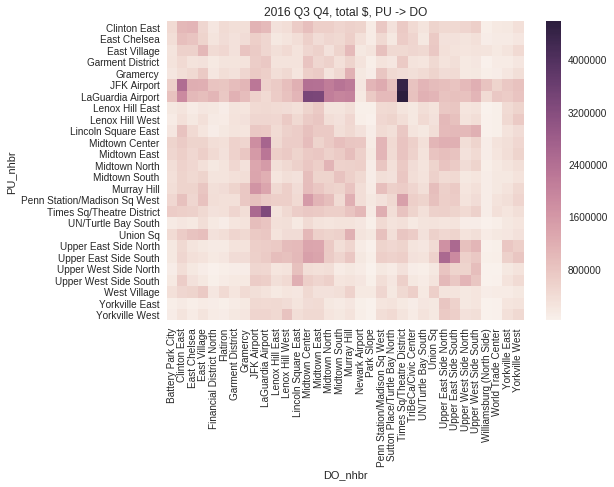

In [186]:
matrix('$')

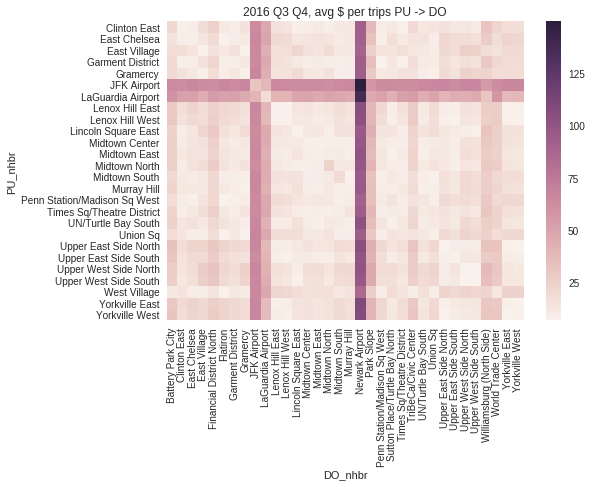

In [187]:
matrix('$', avg=True)

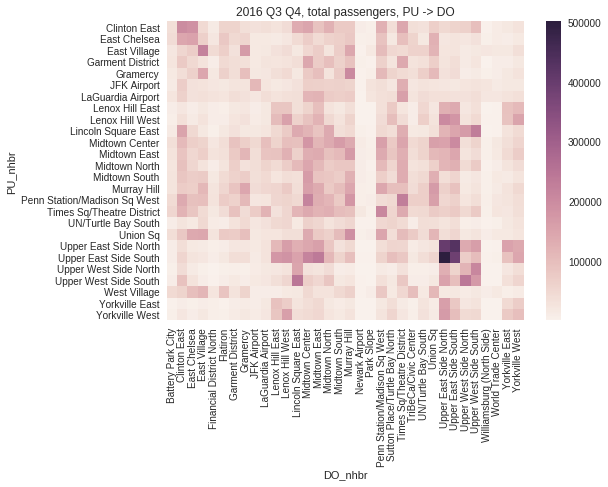

In [188]:
matrix('passengers')

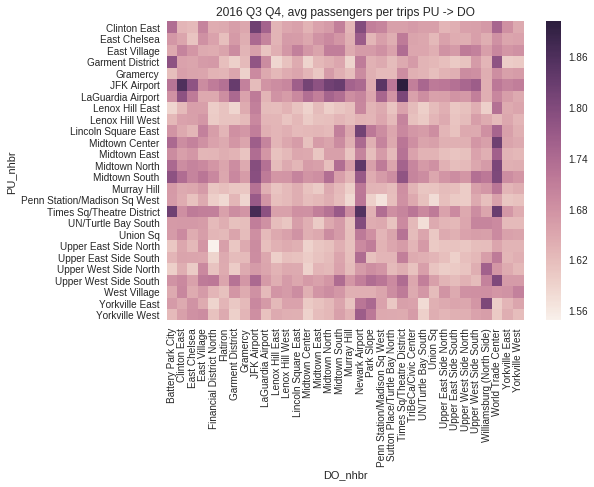

In [189]:
matrix('passengers', avg=True)

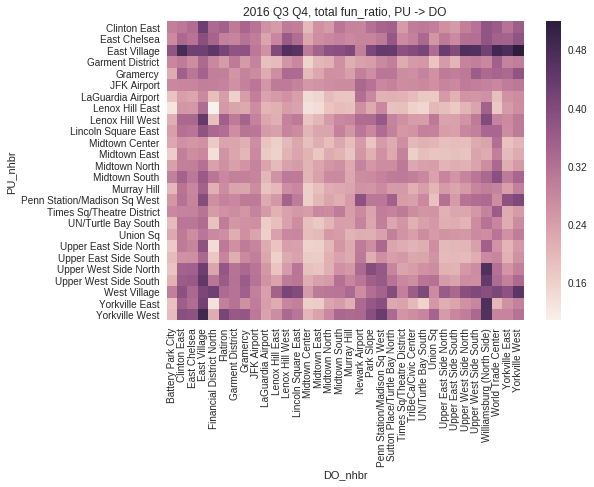

In [190]:
data['fun_ratio'] = data['wend_trips']/(data['week_trips']+data['wend_trips'])
matrix('fun_ratio')

In [156]:

# http://seaborn.pydata.org/generated/seaborn.heatmap.html
#>>> import numpy as np; np.random.seed(0)
#>>> import seaborn as sns; sns.set()
#>>> flights = sns.load_dataset("flights")
#>>> flights = flights.pivot("month", "year", "passengers")
#flights
#plt.xticks(rotation=90)
#>>> ax = sns.heatmap(flights)